1-import
2-download dataset
3-check dataset
4-check data for imbalance
5-Image preprocessing
6-build model
7-train and save model
8-test model and plot results

In [22]:
#Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os
import tensorflow as tf
import kagglehub

In [ ]:
#Download Dataset

path = kagglehub.dataset_download("ravirajsinh45/real-life-industrial-dataset-of-casting-product")
print("Path to dataset files:", path)

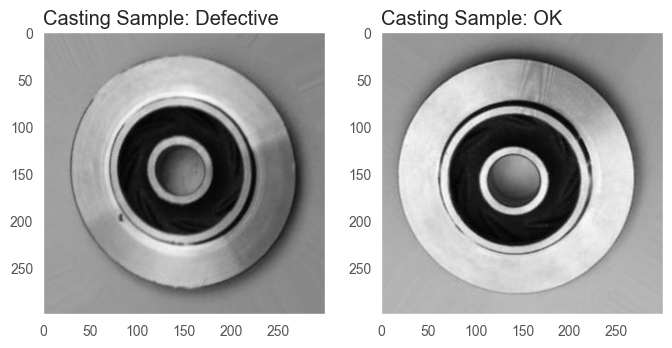

In [30]:
#Check Dataset

#TODO try to put relative paths
# Specify directory of train data
train_dir = 'C:/Università/DL/DeepLearning_Bonsignore_Quercetti/dataset/casting_data/train/'
train_def_dir = train_dir + 'def_front/'  # Label: Defective
train_ok_dir = train_dir + 'ok_front/'    # Label: OK

# Specify directory of test data
test_dir = 'C:/Università/DL/DeepLearning_Bonsignore_Quercetti/dataset/casting_data/test/'
test_def_dir = test_dir + 'def_front/'
test_ok_dir = test_dir + 'ok_front/'

# Plot samples of defective and non-defective casting
fig, axes = plt.subplots(1, 2, figsize=(8,4))
sample_def = plt.imread(train_def_dir+os.listdir(train_def_dir)[0])
sample_ok = plt.imread(train_ok_dir+os.listdir(train_ok_dir)[0])
axes[0].imshow(sample_def)
axes[1].imshow(sample_ok)
axes[0].set_title('Casting Sample: Defective', loc='left')
axes[1].set_title('Casting Sample: OK', loc='left')
axes[0].grid(False)
axes[1].grid(False)
plt.show()

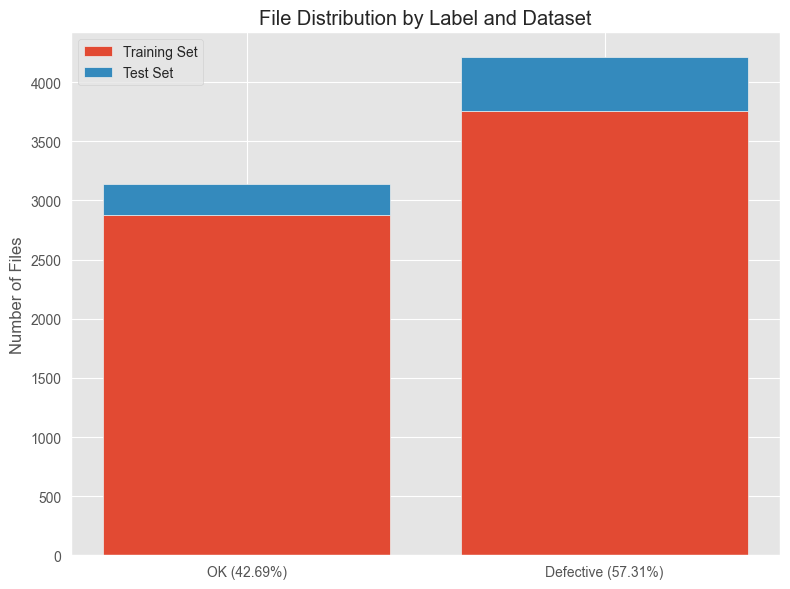

In [40]:
#Check Dataset for Data Imbalance
train_len = [len(next(os.walk(train_ok_dir))[2]), len(next(os.walk(train_def_dir))[2])]
test_len = [len(next(os.walk(test_ok_dir))[2]), len(next(os.walk(test_def_dir))[2])]
ok_pct = (train_len[0]+test_len[0]) / (train_len[0] + test_len[0] + train_len[1] + test_len[1]) * 100
def_pct = (train_len[1]+test_len[1]) / (train_len[0] + test_len[0] + train_len[1] + test_len[1]) * 100

labels = [f'OK ({ok_pct:.2f}%)', f'Defective ({def_pct:.2f}%)']

x = range(len(labels))

plt.figure(figsize=(8, 6))
plt.bar(x, train_len, label='Training Set')
plt.bar(x, test_len, bottom=train_len, label='Test Set')

plt.xticks(x, labels)
plt.ylabel('Number of Files')
plt.title('File Distribution by Label and Dataset')
plt.legend()

plt.tight_layout()
plt.show()